In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Desktop\Vivek\Machine Learning\car data.csv')

In [3]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
car_dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
car_dataset.shape

(301, 9)

In [6]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())

print(car_dataset.Seller_Type.value_counts())

print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
Fuel_Type=LabelEncoder()
Seller_Type=LabelEncoder()
Transmission=LabelEncoder()

In [10]:
car_dataset['Fuel_Type']= Fuel_Type.fit_transform(car_dataset['Fuel_Type'])
car_dataset['Seller_Type']= Fuel_Type.fit_transform(car_dataset['Seller_Type'])
car_dataset['Transmission']= Fuel_Type.fit_transform(car_dataset['Transmission'])


In [11]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [12]:
x = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = car_dataset['Selling_Price']

In [13]:
x.dtypes

Year               int64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int32
Seller_Type        int32
Transmission       int32
Owner              int64
dtype: object

In [14]:
# Splitting the data set using sklearn model seletion
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train , y_train)

LinearRegression()

In [18]:
# prediction on Training data
training_data_prediction = model.predict(X_train)

In [19]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8838169193709795


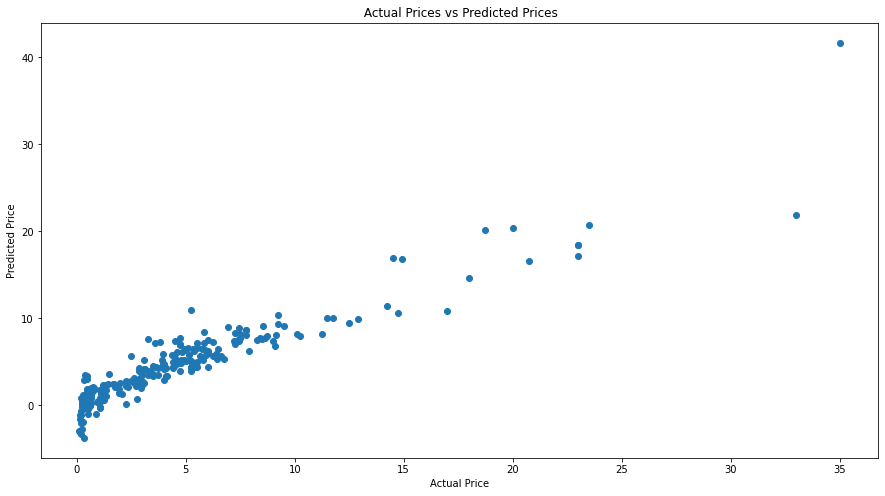

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [21]:
# prediction on Training data
test_data_prediction = model.predict(X_test)

In [22]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8401532365378516


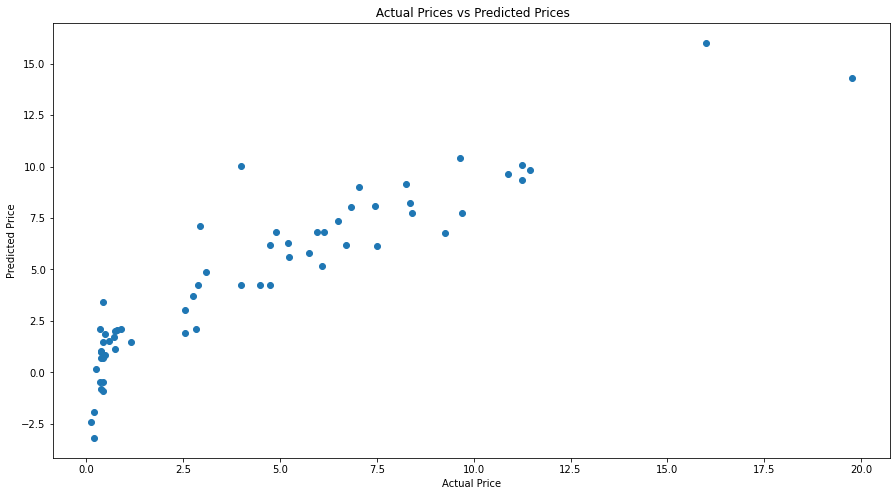

In [23]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

USING LASSO REGRESSION

In [25]:
#loading the linear regression model
lass_reg_model = Lasso()

In [26]:
lass_reg_model.fit(X_train,y_train)

Lasso()

In [27]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [28]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.843587395258283


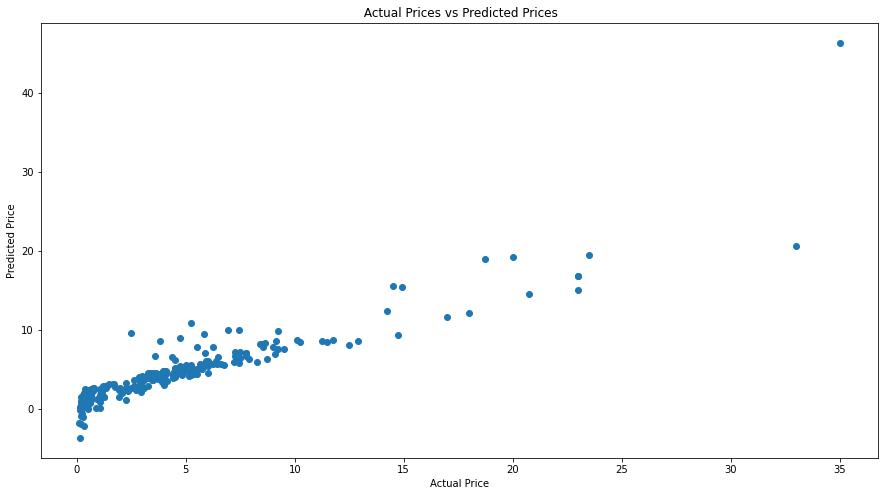

In [29]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Testing data
test_data_prediction = lass_reg_model.predict(X_test)

In [30]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8401532365378516


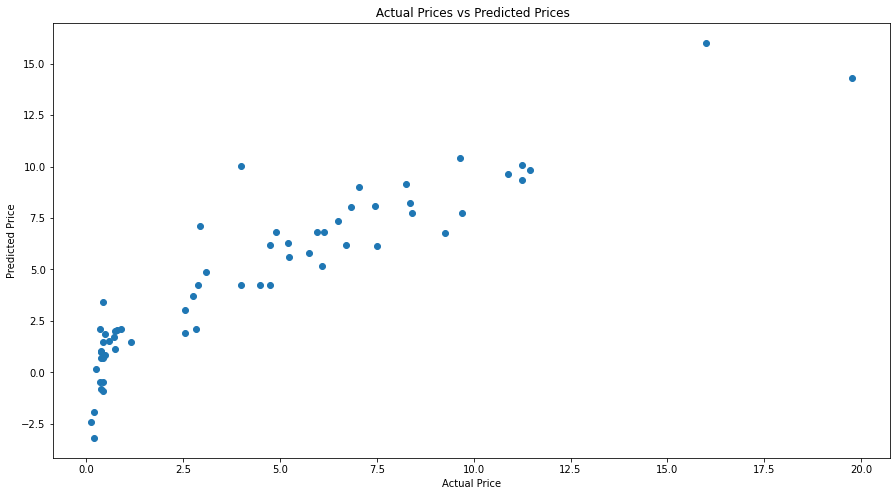

In [31]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()